# Trabajo final finanzas computacionales

Trabajado por:

Juan Andres Restrepo 

Manuel Zarabanda

Para realizar la regresion logistica lo primero que debemos hacer es importar las librerías que vamos a usar:

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

Una vez que hemos importado nuestras librerías, procedemos a leer nuestro archivo xlsx y convertirlo en un data frame.

Luego, limpiamos nuestro dataframe para eliminar los valores vacíos.

In [ ]:
# le decimos al programa cuál es el archivo
datos = "bankloans def.xlsx"
# leemos nuestro archivo
Hoja = pd.read_excel(datos)
# verificamos en forma de false y true
# dónde los datos que salgan como true 
# van a ser aquellos que están vacios
Hoja_veri = pd.isnull(Hoja)
Hoja_limpia = Hoja
# realizamos un for para recorrer
# nuestro dataframe
for i in range(len(Hoja)):
  for j in range(9):
    # si en la fila y en la columna
    # en la que estamos, el valor es true
    # le damos a esa celda vacía un valor de 0
    if Hoja_veri.iloc[i,j] == True:
      Hoja_limpia.at[i,'default'] = 0
    else:
      pass

El primer paso antes de generar un modelo de regresión logística simple es representar los datos para poder intuir si existe una relación entre la variable independiente y la variable respuesta.

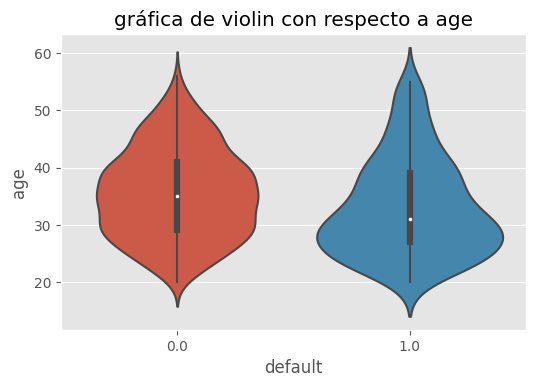

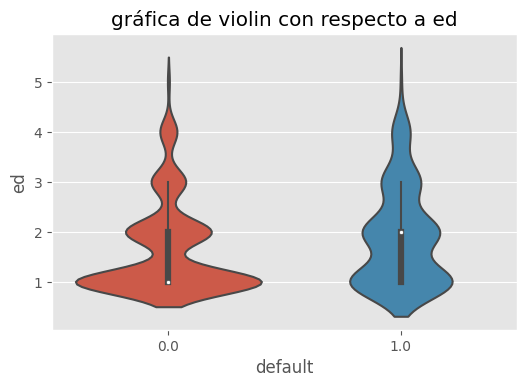

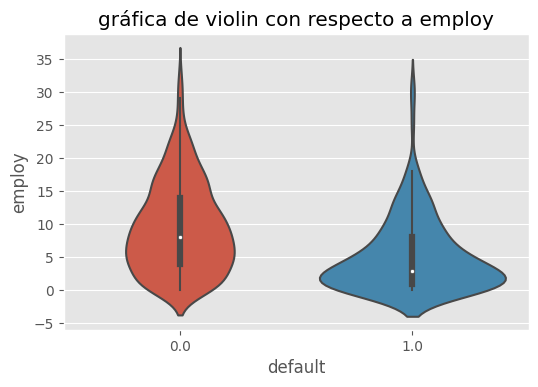

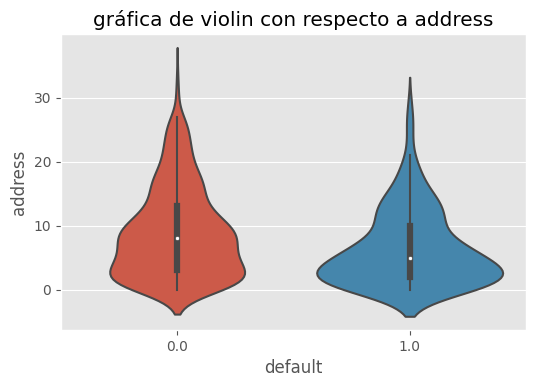

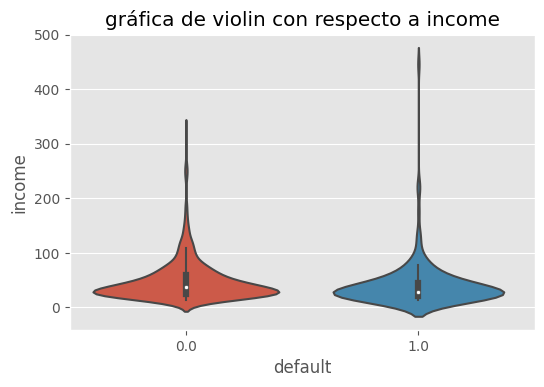

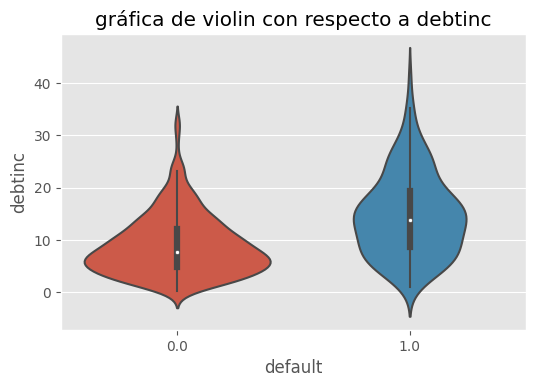

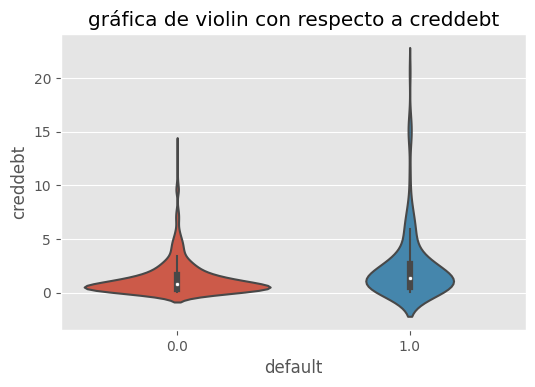

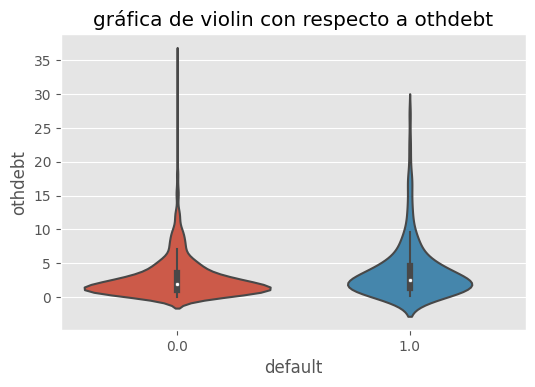

In [ ]:
# realizamos una lista con los nombres de las columnas
Columns_name = Hoja_limpia.columns.values
# realizamos un for para realizar un gráfico de todas las columnas vs default
for i in range(8):
  # le damos un tamaño al axis 
  fig, ax = plt.subplots(figsize=(6,3.84))
  # realizamos una gráfica de violin
  sns.violinplot(x="default",y=Columns_name[i],data = Hoja_limpia,ax = ax)
  ax.set_title(f"gráfica de violin con respecto a {Columns_name[i]}")

Una vez hecho esto, procedemos a hacer la regresion logística, de todas las columnas vs default, y de todas conjuntas vs default.

In [ ]:
# regresion logistica de todas las columnas contra default
# se definen los ejes

X = Hoja_limpia.drop("default",axis=1)
Y = Hoja_limpia["default"]

# definimos los train y los test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 1)

# realizamos la regresion logistica

log = LogisticRegression()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
log_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('log', log)
])
print(f"\n\nRegresion logistica para todas las Columnas: \n\n")
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(model_name+":\n")
    print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
    print("Clasisfication Report:\n", classification_report(Y_test, Y_pred))

print(f"\n\n Regresion logistica para todas las columnas una por una")
for i in range(8):
  Y = Hoja_limpia["default"]
  X = Hoja_limpia[[Columns_name[i]]]
  
 # definimos los train y los test
  X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
  X_train = sm.add_constant(X_train, prepend=True)
  modelo = sm.Logit(endog=Y_train, exog=X_train,)
  modelo = modelo.fit()
  print(f"\n\nRegresión logística de {Columns_name[i]}\n")
  print(f"{modelo.summary()}\n\n")



Regresion logistica para todas las Columnas: 


Logistic Regression:

Accuracy Score: 0.8235294117647058
Confusion Matrix:
 [[132   2]
 [ 28   8]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       134
         1.0       0.80      0.22      0.35        36

    accuracy                           0.82       170
   macro avg       0.81      0.60      0.62       170
weighted avg       0.82      0.82      0.78       170

Random Forest Classifier:

Accuracy Score: 0.8352941176470589
Confusion Matrix:
 [[131   3]
 [ 25  11]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       134
         1.0       0.79      0.31      0.44        36

    accuracy                           0.84       170
   macro avg       0.81      0.64      0.67       170
weighted avg       0.83      0.84      0.81       170

KNN Classifier:

Accuracy Score: 0.7764705882

Realizamos las gráficas de la regresion logistica

Optimization terminated successfully.
         Current function value: 0.499178
         Iterations 6


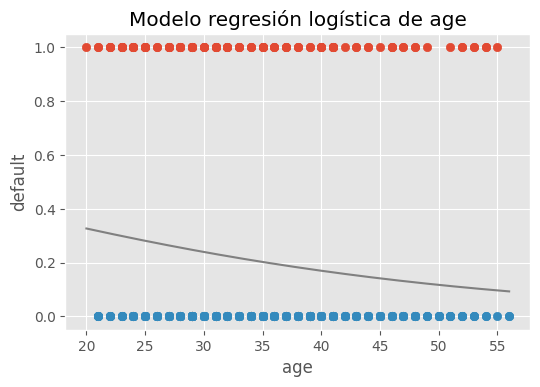

In [ ]:
Y = Hoja_limpia["default"]
X = Hoja_limpia[["age"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()

# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)

# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.age),stop  = max(Hoja_limpia.age),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de age")
ax.set_ylabel("default")
ax.set_xlabel("age");



Optimization terminated successfully.
         Current function value: 0.504291
         Iterations 5


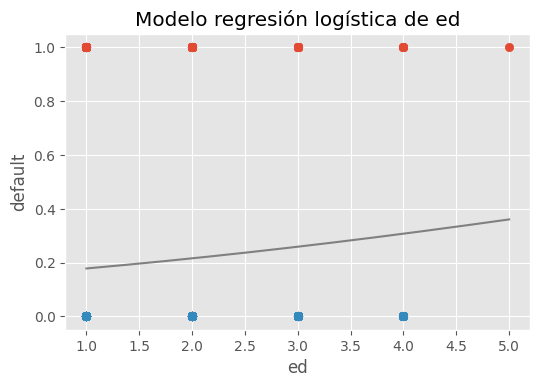

In [ ]:
#regresion logistica de ed
Y = Hoja_limpia["default"]
X = Hoja_limpia[["ed"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.ed),stop  = max(Hoja_limpia.ed),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de ed")
ax.set_ylabel("default")
ax.set_xlabel("ed");

Optimization terminated successfully.
         Current function value: 0.469428
         Iterations 6


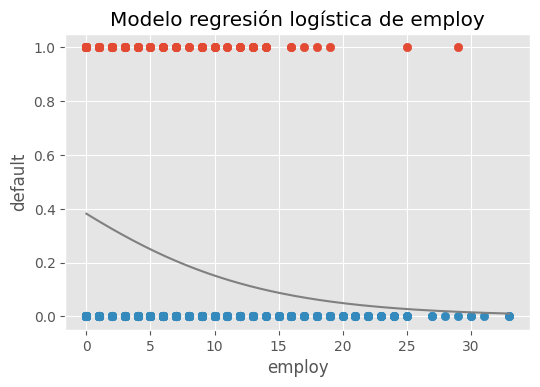

In [ ]:
#regresion logistica de employ
Y = Hoja_limpia["default"]
X = Hoja_limpia[["employ"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.employ),stop  = max(Hoja_limpia.employ),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de employ")
ax.set_ylabel("default")
ax.set_xlabel("employ");

Optimization terminated successfully.
         Current function value: 0.495820
         Iterations 6


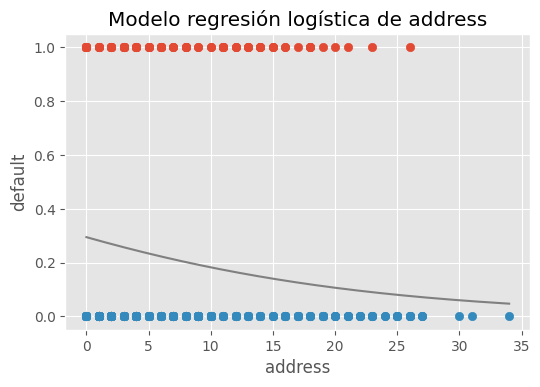

In [ ]:
#regresion logistica de address
Y = Hoja_limpia["default"]
X = Hoja_limpia[["address"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.address),stop  = max(Hoja_limpia.address),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de address")
ax.set_ylabel("default")
ax.set_xlabel("address");

Optimization terminated successfully.
         Current function value: 0.500859
         Iterations 6


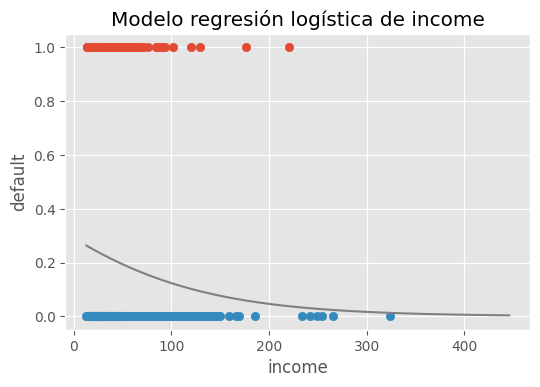

In [ ]:
#regresion logistica de income
Y = Hoja_limpia["default"]
X = Hoja_limpia[["income"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
predicciones[:4]
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.income),stop  = max(Hoja_limpia.income),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de income")
ax.set_ylabel("default")
ax.set_xlabel("income");

Optimization terminated successfully.
         Current function value: 0.452293
         Iterations 6


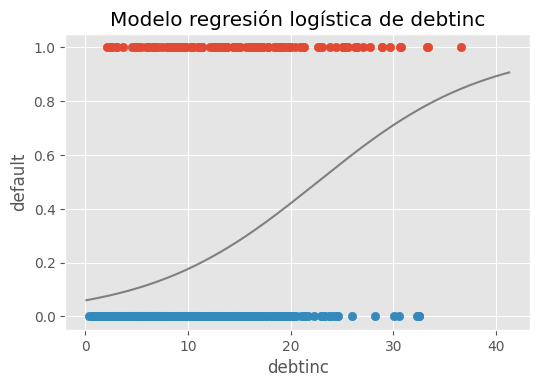

In [ ]:
#regresion logistica de debtinc
Y = Hoja_limpia["default"]
X = Hoja_limpia[["debtinc"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
predicciones[:4]
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.debtinc),stop  = max(Hoja_limpia.debtinc),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de debtinc")
ax.set_ylabel("default")
ax.set_xlabel("debtinc");

Optimization terminated successfully.
         Current function value: 0.493414
         Iterations 5


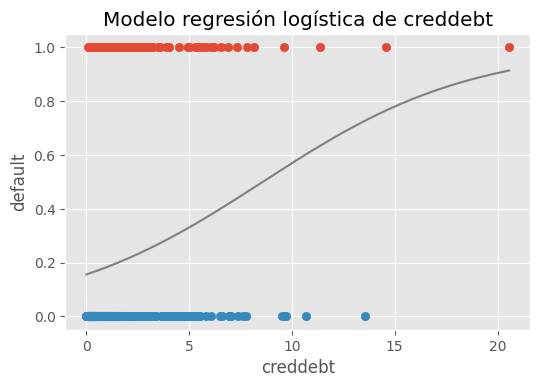

In [ ]:
#regresion logistica de creddebt
Y = Hoja_limpia["default"]
X = Hoja_limpia[["creddebt"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
predicciones[:4]
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.

grid_X = np.linspace(start = min(Hoja_limpia.creddebt),stop  = max(Hoja_limpia.creddebt),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)

# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de creddebt")
ax.set_ylabel("default")
ax.set_xlabel("creddebt");

Optimization terminated successfully.
         Current function value: 0.504434
         Iterations 5


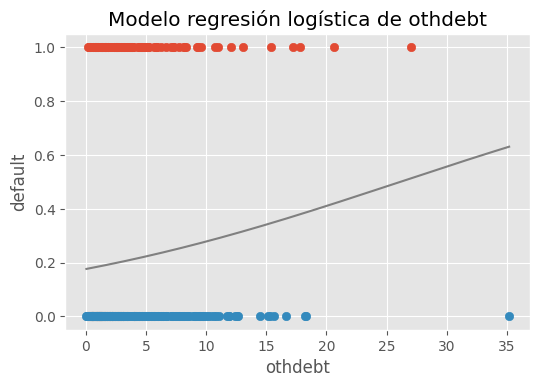

In [ ]:
#regresion logistica de othdebt
Y = Hoja_limpia["default"]
X = Hoja_limpia[["othdebt"]]
# definimos los train y los test
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
# Predicción de probabilidades

predicciones = modelo.predict(exog = X_train)
predicciones[:4]
# Predicciones en todo el rango de X

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(start = min(Hoja_limpia.othdebt),stop  = max(Hoja_limpia.othdebt),num   = 200).reshape(-1,1)
grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(Y_train == 1).flatten(), 1],
    Y_train[(Y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(Y_train == 0).flatten(), 1],
    Y_train[(Y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística de othdebt")
ax.set_ylabel("default")
ax.set_xlabel("othdebt");

#PD

probabilidad de incumplimiento

Realizamos la regresion logística

In [ ]:
# Variables independientes
X_multi = Hoja_limpia.drop("default", axis = 1)

# Estatus del préstamo como variable a predecir
y = Hoja_limpia[['default']]

# Modelo de regresión logística multivariada
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-1.99275734]


Vemos como el modelo tiene un interceptó más cercano a cero, Esto significa que las probabilidades logarítmicas de un no incumplimiento se acercan a cero.

In [ ]:
from sklearn.model_selection import train_test_split

# Variables independientes y dependiente
# X = Hoja_limpia[['loan_int_rate','person_emp_length','person_income']]
X = Hoja_limpia.drop('default', axis=1)
y = Hoja_limpia[['default']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Coeficientes del modelo
print(clf_logistic.coef_)

[[ 0.01658191  0.09200201 -0.20582924 -0.06918192  0.001615    0.08128857
   0.35281623  0.01421739]]


Los coeficientes indican la importancia de cada columna o característica para la predicción. Cuanto más positivo es el valor, más predice los incumplimientos.

#Ahora realizamos la codificación dummie

In [ ]:
# Conjutos de datos numéricos y no numéricos
cred_num = Hoja_limpia.select_dtypes(exclude=['object'])
cred_str = Hoja_limpia.select_dtypes(include=['object'])


# Unión de las variables numéricas con las codificadas
Hoja_limpia_prep = pd.concat([cred_num], axis=1)

# Lista de columnas del nuevo conjunto de datos
print(Hoja_limpia_prep.columns)

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')


#Ahora realizamos la predicción de probabilidad de incumplimiento

In [ ]:
# Variables independientes y dependiente
X = Hoja_limpia_prep.drop('default',axis=1)
y = Hoja_limpia_prep[['default']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Entrenamiento del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
preds = clf_logistic.predict_proba(X_test)

# Marcos de datos de las primeras cinco predicciones y las primeras cinco etiquetas verdaderas
preds_df = pd.DataFrame(preds[:,1][0:20], columns = ['prob_default'])
true_df = y_test.head(20)

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))
Prob_PD = preds_df

    default  prob_default
0       0.0      0.221598
1       0.0      0.118652
2       0.0      0.025607
3       0.0      0.176358
4       0.0      0.223242
5       1.0      0.518471
6       0.0      0.031478
7       0.0      0.078535
8       1.0      0.348899
9       0.0      0.009111
10      1.0      0.135534
11      0.0      0.052815
12      0.0      0.437644
13      0.0      0.223033
14      0.0      0.292110
15      1.0      0.382153
16      0.0      0.007765
17      1.0      0.664973
18      1.0      0.214524
19      1.0      0.989795


ya hemos hallado nuestro pd, los datos de nuestra probabilidad de incumplimiento se encuentran en la columna prob_default

#realizamos el informe de default

In [ ]:
# Dataframe de las probabilidades de incumplimiento
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Estado del préstamo según la probabilidad asignada
preds_df['default'] = preds_df['prob_default'].apply(lambda X: 1 if X > .5 else 0)

# Recuento de filas para cada estado de préstamo
print(preds_df['default'].value_counts())
from sklearn.metrics import classification_report
print("\n")
# Reporte de clasificación
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['default'], target_names=target_names))

0    301
1     39
Name: default, dtype: int64


              precision    recall  f1-score   support

 Non-Default       0.88      0.94      0.91       282
     Default       0.59      0.40      0.47        58

    accuracy                           0.85       340
   macro avg       0.74      0.67      0.69       340
weighted avg       0.83      0.85      0.84       340



Se predijo que casi todo nuestro conjunto de prueba no sería default. El 40% de los defaults reales se predijeron correctamente.

##Hallamos la perdida total esperada

In [ ]:
Perdida_total_esperada = preds_df['prob_default'] *(0.2 * 11784)*Hoja_limpia_prep['creddebt']
print(f"la perdida esperada es de: {Perdida_total_esperada.sum()}")

la perdida esperada es de: 236555.52678667908


##Simulacion de montecarlo

In [ ]:
import seaborn as sns
from scipy.stats import norm

In [ ]:

log_returns = np.log(1 + Hoja_limpia.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

# los días a los cuales queremos hacer la simulación
days = 9
# el número de pruebas que realizaremos
trials = 9000
# el componente de azar
z = norm.ppf(np.random.rand(days, trials))
retornos_diarios = np.exp(drift.values[:, np.newaxis] + stdev.values[:, np.newaxis] * z)
camino_de_precios = np.zeros_like(retornos_diarios)
camino_de_precios[0] = np.tile(Hoja_limpia.iloc[-1].values, trials // Hoja_limpia.shape[1])
for i in range(1, days):
    camino_de_precios[i] = camino_de_precios[i-1] * retornos_diarios[i]

plt.plot(camino_de_precios)
plt.xlabel("Número de días")
plt.ylabel("Precio")
sns.displot(pd.DataFrame(camino_de_precios).iloc[0])
plt.xlabel("Precio a " + str(days) + " días")
plt.ylabel("Frecuencia")
plt.show()